#Data Analysis on Disaster

In [ ]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import plotly.express as px
import seaborn as sns


In [ ]:
df=pd.read_csv('Project_Dataset.csv')

In [ ]:
df.shape #Display Number of rows and columns

(14644, 11)

In [ ]:
df.head()  #Display Top 5 data

,Dis No,Year,Disaster Group,Disaster Type,Country,Latitude,Longitude,Total Deaths,No Affected,Total Affected,Total Damages ('000 US$)
0,1970-0013-ARG,1970,Natural,Flood,Argentina,NaN,NaN,36.0,NaN,NaN,25000.0
1,1970-0109-AUS,1970,Natural,Storm,Australia,NaN,NaN,13.0,NaN,NaN,72475.0
2,1970-0044-BEN,1970,Natural,Flood,Benin,NaN,NaN,NaN,NaN,NaN,200.0
3,1970-0063-BGD,1970,Natural,Storm,Bangladesh,NaN,NaN,300000.0,3648000.0,3648000.0,86400.0
4,1970-0026-BGD,1970,Natural,Storm,Bangladesh,NaN,NaN,17.0,110.0,110.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14644 entries, 0 to 14643
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Dis No                    14644 non-null  object 
 1   Year                      14644 non-null  int64  
 2   Disaster Group            14644 non-null  object 
 3   Disaster Type             14644 non-null  object 
 4   Country                   14644 non-null  object 
 5   Latitude                  2331 non-null   object 
 6   Longitude                 2335 non-null   object 
 7   Total Deaths              10199 non-null  float64
 8   No Affected               8846 non-null   float64
 9   Total Affected            11041 non-null  float64
 10  Total Damages ('000 US$)  4863 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1.2+ MB


Dealing With Missing Values

In [ ]:
df.isnull().sum()  #Dispaly Null Values

Dis No                          0
Year                            0
Disaster Group                  0
Disaster Type                   0
Country                         0
Latitude                    12313
Longitude                   12309
Total Deaths                 4445
No Affected                  5798
Total Affected               3603
Total Damages ('000 US$)     9781
dtype: int64

In [ ]:
#Fill 0 in Place of Null Values
df.fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

Dis No                      0
Year                        0
Disaster Group              0
Disaster Type               0
Country                     0
Latitude                    0
Longitude                   0
Total Deaths                0
No Affected                 0
Total Affected              0
Total Damages ('000 US$)    0
dtype: int64

In [ ]:
df.describe()

,Year,Total Deaths,No Affected,Total Affected,Total Damages ('000 US$)
count,14644.000000,14644.000000,1.464400e+04,1.464400e+04,1.464400e+04
mean,2001.596422,251.989347,5.369637e+05,5.486868e+05,2.572590e+05
std,12.538572,5422.869510,6.760329e+06,6.824403e+06,2.847705e+06
min,1970.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1993.000000,0.000000,0.000000e+00,3.000000e+00,0.000000e+00
50%,2003.000000,6.000000,6.000000e+02,1.500000e+03,0.000000e+00
75%,2012.000000,30.000000,2.000000e+04,2.500000e+04,1.000000e+04
max,2021.000000,300000.000000,3.300000e+08,3.300000e+08,2.100000e+08


#Train Test Split

In [ ]:
#Creating two dataframes x and y
col = ['No Affected', 'Total Affected']
X = df.loc[:, col]
y = df.loc[:, ['Total Deaths']]



In [ ]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [ ]:
print("X =",X.shape)              # Print the shape of the original feature DataFrame X
print("X_train =",X_train.shape)  # Print the shape of the training feature set X_train
print("X_test =",X_test.shape)    # Print the shape of the testing feature set X_test
print('-----------------------')  # Print a separator line for better readability
print("y =",y.shape)              # Print the shape of the original target variable DataFrame y
print("y_train =",y_train.shape)  # Print the shape of the training target set y_train
print("y_test =",y_test.shape)    # Print the shape of the testing target set y_test


X = (14644, 2)
X_train = (11715, 2)
X_test = (2929, 2)
-----------------------
y = (14644, 1)
y_train = (11715, 1)
y_test = (2929, 1)


In [ ]:
#KNeighborsRegressor Initialization
reg = KNeighborsRegressor(n_neighbors=5)
#Training the Model
reg.fit(X_train,y_train)

KNeighborsRegressor()

In [ ]:
#Calculate the R-squared score on the test data
reg.score(X_test, y_test)

-0.7911106633212883

In [ ]:
#Select the last row of the test features (X_test)
X_test.iloc[-1,:]

No Affected       40154.0
Total Affected    40281.0
Name: 11449, dtype: float64

In [ ]:
#Make a prediction for the selected test feature using the trained model
reg.predict([X_test.iloc[-1, :]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([[11.4]])

In [ ]:
#Select the last row of the test target variable (y_test)
y_test.iloc[-1]

Total Deaths    42.0
Name: 11449, dtype: float64

In [ ]:
#Predict all target values for the test features
y_pred = reg.predict(X_test)
y_pred

array([[ 41.8],
       [ 34. ],
       [ 13.8],
       ...,
       [  6.2],
       [572.2],
       [ 11.4]])

In [ ]:
#Display the actual test target values (y_test)
y_test

,Total Deaths
9891,13.0
6481,5.0
1679,76.0
10972,4.0
12479,51.0
...,...
1735,0.0
3243,75.0
2996,0.0
2607,15.0


In [ ]:
disaster_counts = df['Disaster Type'].value_counts()
print(disaster_counts)

Flood                    5272
Storm                    4005
Epidemic                 1436
Earthquake               1137
Landslide                 713
Drought                   685
Extreme temperature       584
Wildfire                  452
Volcanic activity         222
Insect infestation         93
Mass movement (dry)        41
Glacial lake outburst       2
Impact                      1
Animal accident             1
Name: Disaster Type, dtype: int64


#Data Visualization

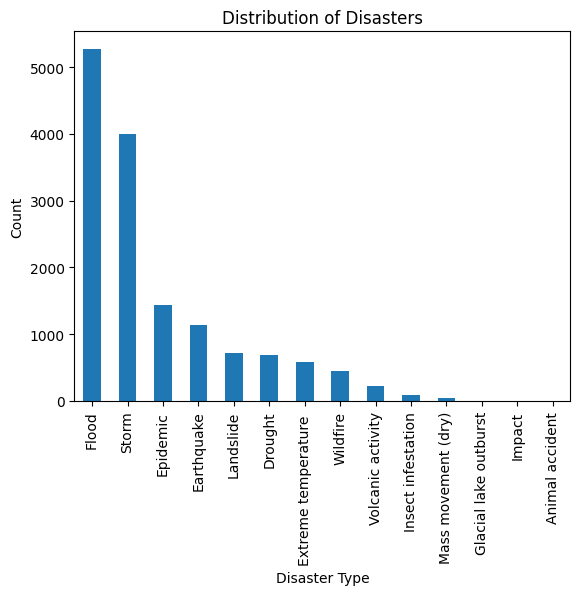

In [ ]:
df['Disaster Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Disasters')
plt.xlabel('Disaster Type')
plt.ylabel('Count')
plt.show()

<ipython-input-22-ba1923da8f4d>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Project_Dataset.corr()
<ipython-input-22-ba1923da8f4d>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Project_Dataset.corr()


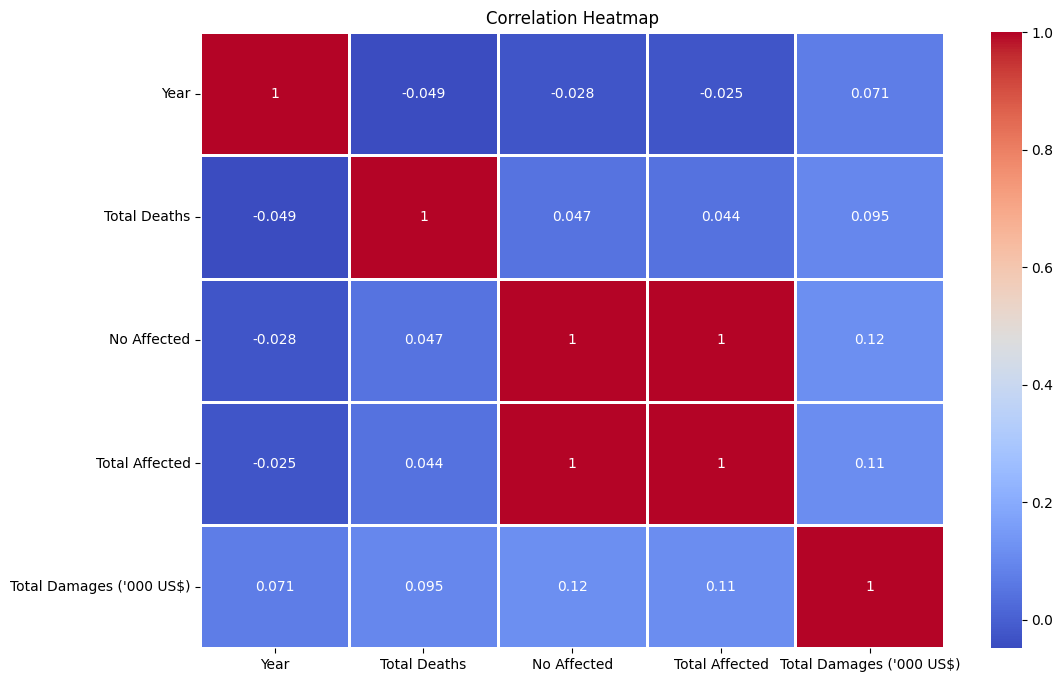

In [ ]:
import pandas as pd

# Load your dataset
Project_Dataset = pd.read_csv("Project_Dataset.csv")

# Now you can proceed with the correlation matrix and heatmap code
correlation_matrix = Project_Dataset.corr()

# Assuming your data is stored in a DataFrame named 'Project_Dataset'
# Compute the correlation matrix
correlation_matrix = Project_Dataset.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=1)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()



#Disaster Occurrence From 1970 to 1980



              Dis No                          Year Disaster Group  \
0      1970-0013-ARG 1970-01-01 00:00:00.000001970        Natural   
1      1970-0109-AUS 1970-01-01 00:00:00.000001970        Natural   
2      1970-0044-BEN 1970-01-01 00:00:00.000001970        Natural   
3      1970-0063-BGD 1970-01-01 00:00:00.000001970        Natural   
4      1970-0026-BGD 1970-01-01 00:00:00.000001970        Natural   
...              ...                           ...            ...   
14639  2021-0449-YEM 1970-01-01 00:00:00.000002021        Natural   
14640  2021-0075-ZAF 1970-01-01 00:00:00.000002021        Natural   
14641  2021-0599-COD 1970-01-01 00:00:00.000002021        Natural   
14642  2021-0020-SRB 1970-01-01 00:00:00.000002021        Natural   
14643  2021-0481-SSD 1970-01-01 00:00:00.000002021        Natural   

      Disaster Type                                 Country Latitude  \
0             Flood                               Argentina        0   
1             Storm        

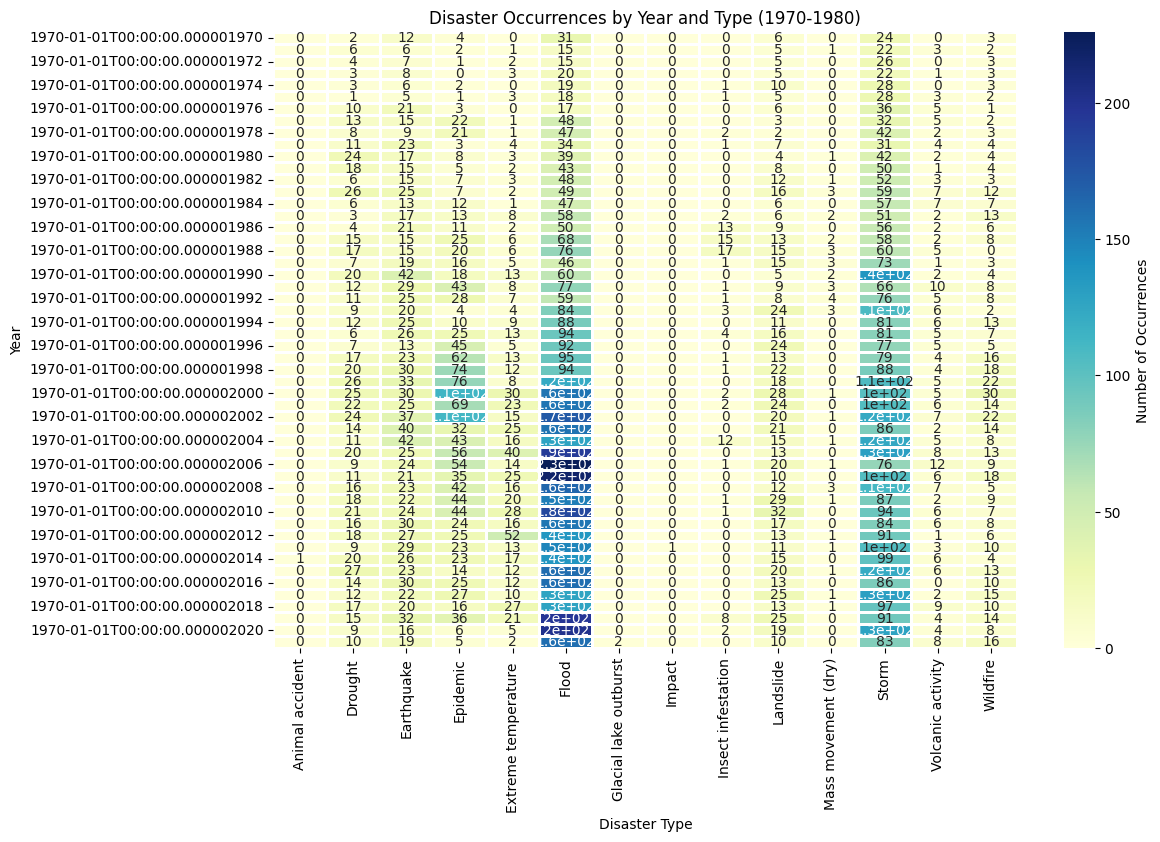

In [ ]:
# Convert the 'Year' column to datetime type if it's not already
df['Year'] = pd.to_datetime(df['Year'], errors='coerce')

# Filter data for the years 1970 to 1980
filtered_data = df[(df['Year'] >= '1970-01-01') & (df['Year'] <= '1980-12-31')]

# Display the filtered data
print(filtered_data)

# Create a pivot table for the heatmap
pivot_table = filtered_data.pivot_table(values='Total Deaths', index='Year', columns='Disaster Type', aggfunc='count', fill_value=0)

# Set up the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", linewidths=1, cbar_kws={'label': 'Number of Occurrences'})
plt.title('Disaster Occurrences by Year and Type (1970-1980)')
plt.xlabel('Disaster Type')
plt.ylabel('Year')
plt.show()


#Disaster Occurrence From 1980 to 1990

              Dis No  Year Disaster Group Disaster Type        Country  \
760    1980-9114-CIV  1980        Natural       Drought  Côte d’Ivoire   
761    1980-0096-DZA  1980        Natural    Earthquake        Algeria   
762    1980-9114-GHA  1980        Natural       Drought          Ghana   
763    1980-9114-BEN  1980        Natural       Drought          Benin   
764    1980-9114-GMB  1980        Natural       Drought   Gambia (the)   
...              ...   ...            ...           ...            ...   
3579   1990-0123-ZMB  1990        Natural      Epidemic         Zambia   
3580   1990-9604-ZMB  1990        Natural       Drought         Zambia   
12027  1980-0365-REU  1980        Natural     Landslide        Réunion   
13439  1989-0596-VUT  1989        Natural      Epidemic        Vanuatu   
13951  1982-0410-MEX  1982        Natural    Earthquake         Mexico   

      Latitude Longitude  Total Deaths  No Affected  Total Affected  \
760          0         0           0.0  

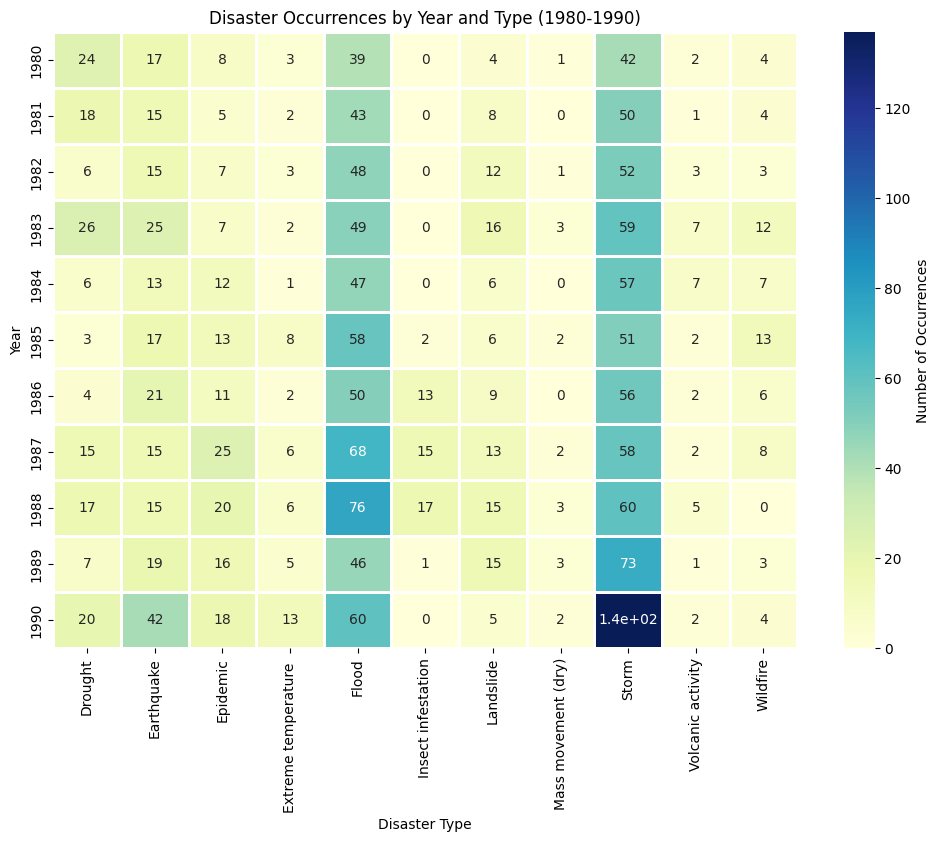

In [ ]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Filter data for the years 1980 to 1990
filtered_data = df[(df['Year'] >= 1980) & (df['Year'] <= 1990)]

# Display or further analyze the filtered data
print(filtered_data)


# Create a pivot table for the heatmap
pivot_table = filtered_data.pivot_table(values='Total Deaths', index='Year', columns='Disaster Type', aggfunc='count', fill_value=0)

# Set up the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", linewidths=1, cbar_kws={'label': 'Number of Occurrences'})
plt.title('Disaster Occurrences by Year and Type (1980-1990)')
plt.xlabel('Disaster Type')
plt.ylabel('Year')
plt.show()




#Disaster Occurrence From 1990 to 2000

              Dis No       Year Disaster Group Disaster Type  \
2530   1990-9579-CMR 1990-01-01        Natural       Drought   
2531   1990-0230-ECU 1990-01-01        Natural    Earthquake   
2532   1990-0272-AUS 1990-01-01        Natural         Storm   
2533   1990-0361-AUT 1990-01-01        Natural         Storm   
2534   1990-9059-BOL 1990-01-01        Natural       Drought   
...              ...        ...            ...           ...   
6217   2000-0300-ZWE 2000-01-01        Natural      Epidemic   
6218   2000-0822-ZWE 2000-01-01        Natural      Epidemic   
6219   2000-0863-ZWE 2000-01-01        Natural      Epidemic   
11586  1993-0586-ECU 1993-01-01        Natural     Landslide   
12463  1992-0557-TZA 1992-01-01        Natural      Epidemic   

                                Country Latitude Longitude  Total Deaths  \
2530                           Cameroon        0         0           0.0   
2531                            Ecuador  0.259 S  78.449 W           4.0   
253

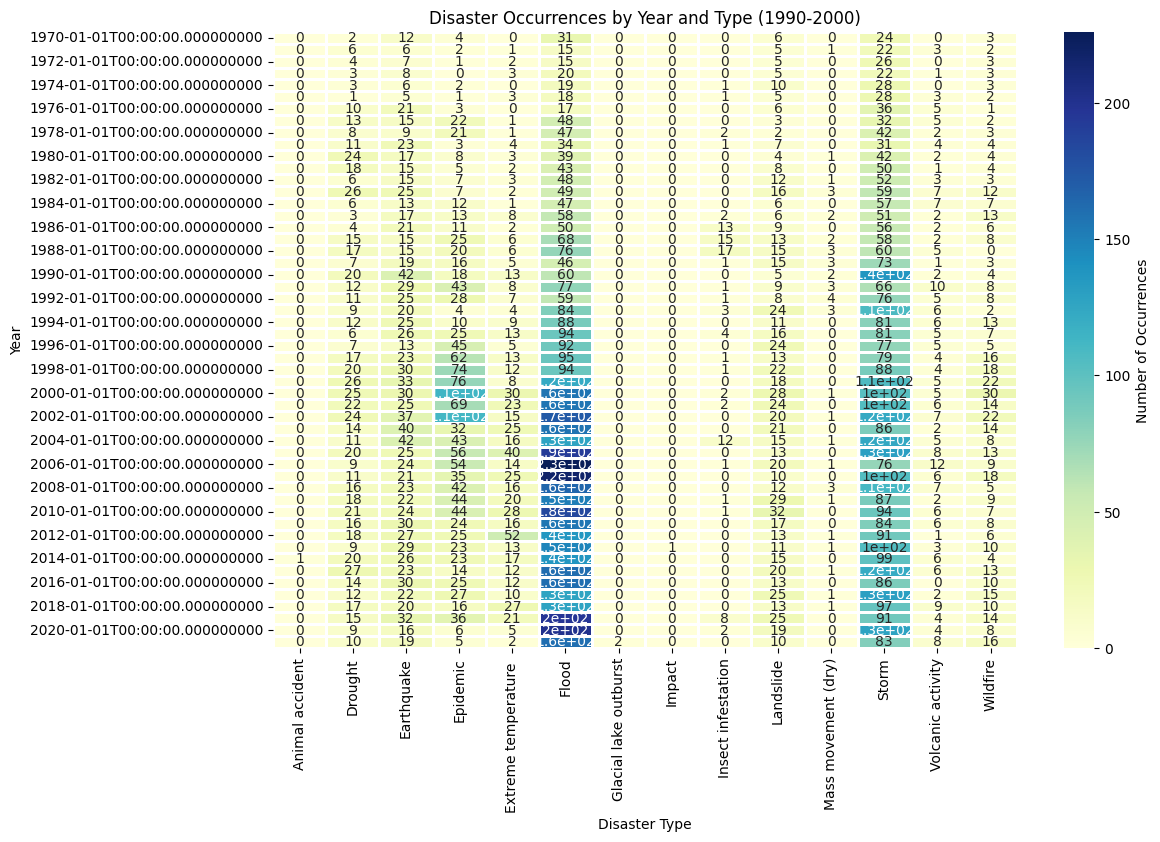

In [ ]:
# Assuming the 'Year' column is in datetime format, if not, convert it to datetime first
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Filter data for the specified range (1990 to 2000)
filtered_data = df[(df['Year'] >= '1990-01-01') & (df['Year'] <= '2000-12-31')]

# Display the filtered data
print(filtered_data)

# Convert 'Year' to datetime format
df['Year'] = pd.to_datetime(df['Year'])

# Create a pivot table for the heatmap
pivot_table = df.pivot_table(values='Total Deaths', index='Year', columns='Disaster Type', aggfunc='count', fill_value=0)

# Set up the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", linewidths=1, cbar_kws={'label': 'Number of Occurrences'})
plt.title('Disaster Occurrences by Year and Type (1990-2000)')  # Update the title accordingly
plt.xlabel('Disaster Type')
plt.ylabel('Year')
plt.show()


#Disaster Occurrence From 2000 to 2010

              Dis No       Year Disaster Group Disaster Type  \
5221   2000-0372-CHN 2000-01-01        Natural         Flood   
5222   2000-9186-AFG 2000-01-01        Natural       Drought   
5223   2000-0373-BGD 2000-01-01        Natural         Flood   
5224   2000-0905-BOL 2000-01-01        Natural         Flood   
5225   2000-0019-BRA 2000-01-01        Natural         Flood   
...              ...        ...            ...           ...   
10755  2010-0619-MNE 2010-01-01        Natural         Flood   
10756  2010-0579-SSD 2010-01-01        Natural         Flood   
10757  2010-0703-SSD 2010-01-01        Natural         Flood   
12028  2005-0821-NPL 2005-01-01        Natural     Landslide   
12464  2003-0830-USA 2003-01-01        Natural         Storm   

                                Country Latitude Longitude  Total Deaths  \
5221                              China        0         0          43.0   
5222                        Afghanistan        0         0          37.0   
522

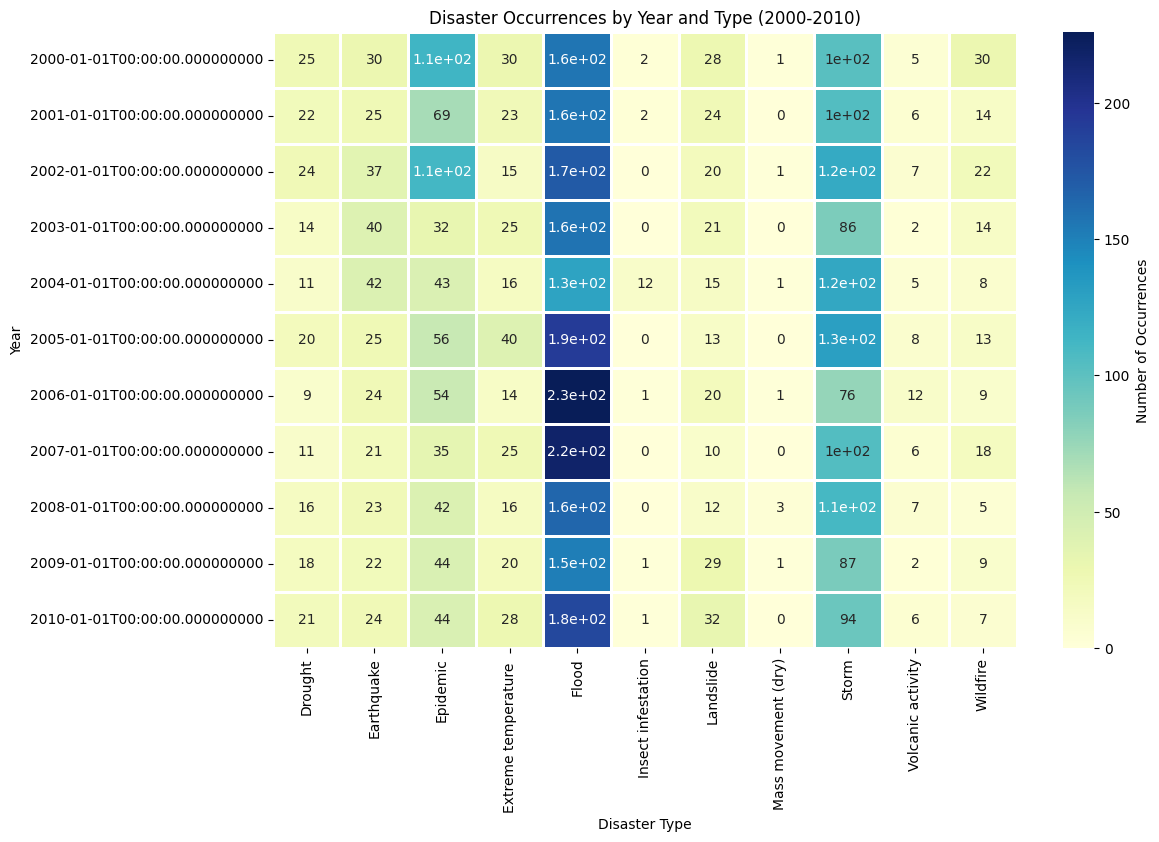

In [ ]:
# Convert 'Year' to datetime format (if not already)
df['Year'] = pd.to_datetime(df['Year'])

# Filter data for the year range 2000 to 2010
filtered_data = df[(df['Year'] >= '2000-01-01') & (df['Year'] <= '2010-12-31')]

# Now 'filtered_data' contains only the data from 2000 to 2010
print(filtered_data)


# Create a pivot table for the heatmap
pivot_table = filtered_data.pivot_table(values='Total Deaths', index='Year', columns='Disaster Type', aggfunc='count', fill_value=0)

# Set up the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", linewidths=1, cbar_kws={'label': 'Number of Occurrences'})
plt.title('Disaster Occurrences by Year and Type (2000-2010)')  # Update the title accordingly
plt.xlabel('Disaster Type')
plt.ylabel('Year')
plt.show()


#Disaster Occurrence From 2010 to 2020

              Dis No       Year Disaster Group Disaster Type  \
9986   2010-0179-CHN 2010-01-01        Natural         Storm   
9987   2010-0484-CHN 2010-01-01        Natural         Storm   
9988   2010-0503-GTM 2010-01-01        Natural         Storm   
9989   2010-0036-CHN 2010-01-01        Natural         Storm   
9990   2010-0102-AUS 2010-01-01        Natural         Storm   
...              ...        ...            ...           ...   
14586  2020-0175-COD 2020-01-01        Natural         Flood   
14587  2020-0031-ZMB 2020-01-01        Natural         Flood   
14588  2020-0110-ZMB 2020-01-01        Natural         Flood   
14589  2020-0131-TLS 2020-01-01        Natural         Flood   
14590  2020-0362-SSD 2020-01-01        Natural         Flood   

                                      Country Latitude Longitude  \
9986                                    China        0         0   
9987                                    China        0         0   
9988                       

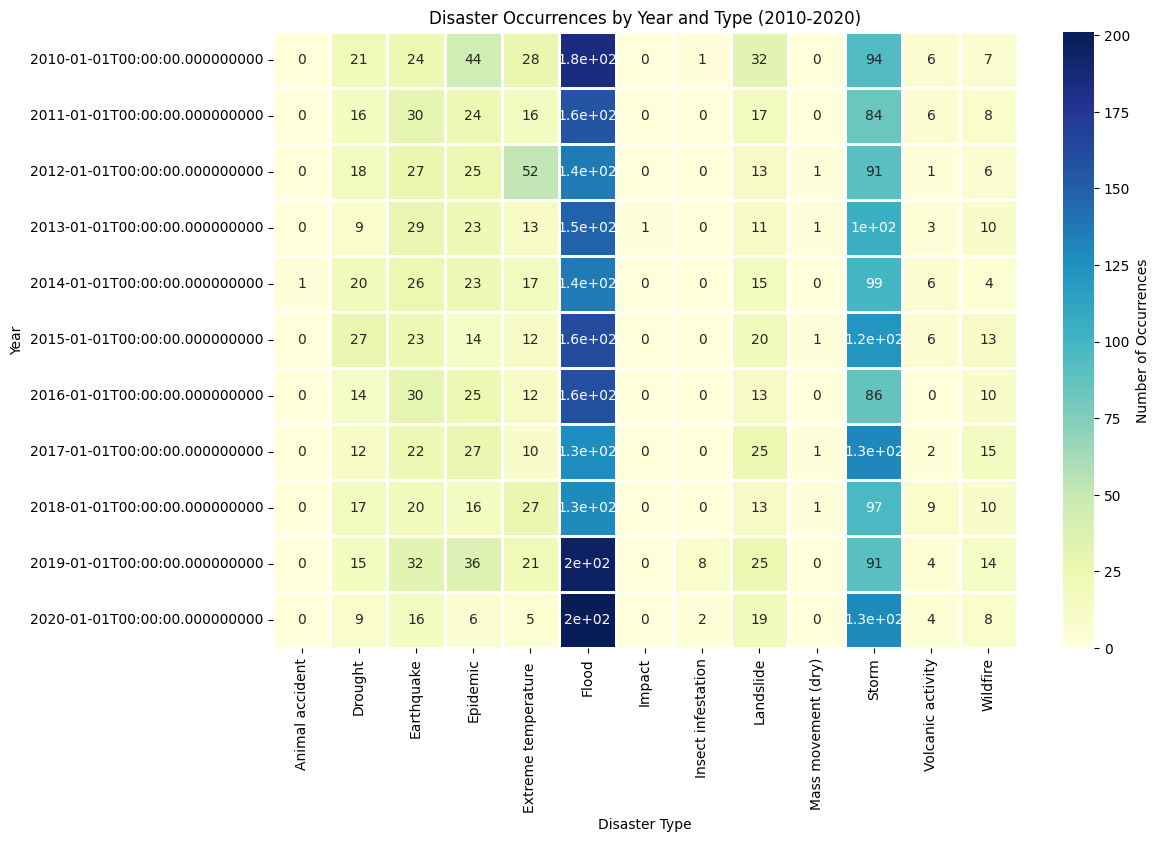

In [ ]:
# Convert 'Year' to datetime format (if not already)
df['Year'] = pd.to_datetime(df['Year'])

# Filter data for the year range 2010 to 2020
filtered_data = df[(df['Year'] >= '2010-01-01') & (df['Year'] <= '2020-12-31')]

# Now 'filtered_data' contains only the data from 2010 to 2020
print(filtered_data)

# Create a pivot table for the heatmap
pivot_table = filtered_data.pivot_table(values='Total Deaths', index='Year', columns='Disaster Type', aggfunc='count', fill_value=0)

# Set up the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", linewidths=1, cbar_kws={'label': 'Number of Occurrences'})
plt.title('Disaster Occurrences by Year and Type (2010-2020)')  # Update the title accordingly
plt.xlabel('Disaster Type')
plt.ylabel('Year')
plt.show()


#Disaster Occurrence From 2020 to 2023

              Dis No       Year Disaster Group Disaster Type  \
13765  2020-0270-BRA 2020-01-01        Natural         Storm   
13766  2020-0418-CHE 2020-01-01        Natural         Storm   
13767  2020-0495-COL 2020-01-01        Natural         Storm   
13768  2020-0554-FJI 2020-01-01        Natural         Storm   
13769  2020-0022-BRA 2020-01-01        Natural         Flood   
...              ...        ...            ...           ...   
14639  2021-0449-YEM 2021-01-01        Natural         Flood   
14640  2021-0075-ZAF 2021-01-01        Natural         Flood   
14641  2021-0599-COD 2021-01-01        Natural      Epidemic   
14642  2021-0020-SRB 2021-01-01        Natural         Flood   
14643  2021-0481-SSD 2021-01-01        Natural         Flood   

                                      Country Latitude Longitude  \
13765                                  Brazil        0         0   
13766                             Switzerland        0         0   
13767                      

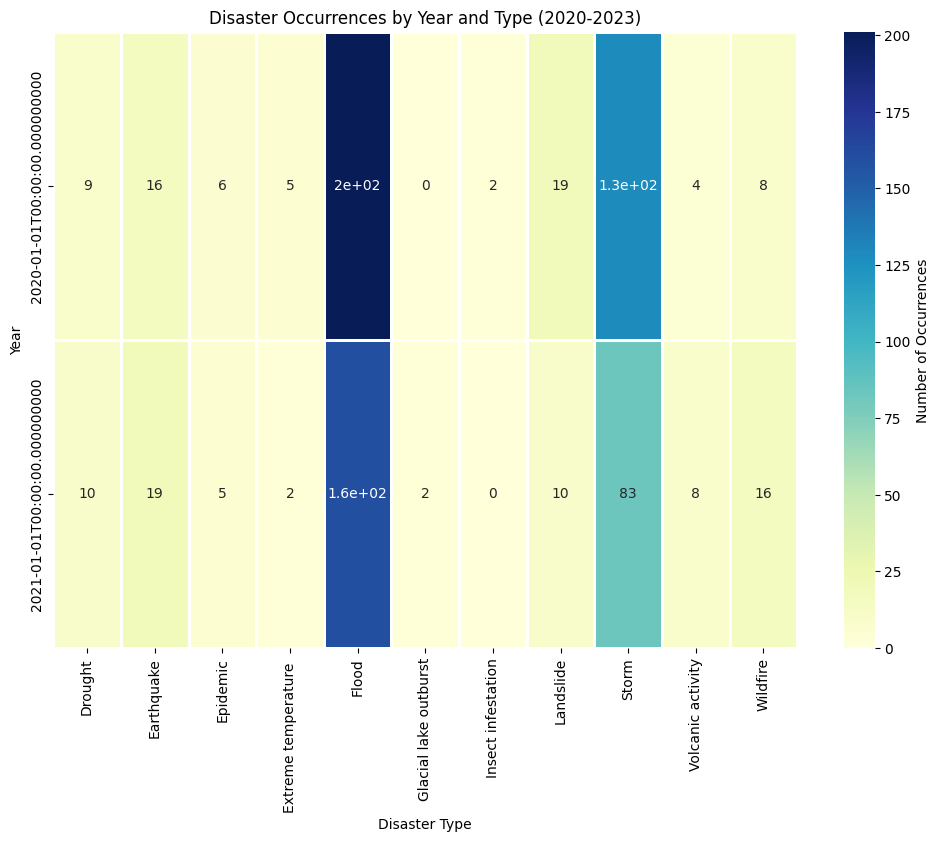

In [ ]:
# Assuming your data is stored in a DataFrame named 'df'
# Convert 'Year' to datetime format (if not already)
df['Year'] = pd.to_datetime(df['Year'])

# Filter data for the year range 2020 to 2023
filtered_data = df[(df['Year'] >= '2020-01-01') & (df['Year'] <= '2023-12-31')]

# Now 'filtered_data' contains only the data from 2020 to 2023
print(filtered_data)

# Create a pivot table for the heatmap
pivot_table = filtered_data.pivot_table(values='Total Deaths', index='Year', columns='Disaster Type', aggfunc='count', fill_value=0)

# Set up the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", linewidths=1, cbar_kws={'label': 'Number of Occurrences'})
plt.title('Disaster Occurrences by Year and Type (2020-2023)')  # Update the title accordingly
plt.xlabel('Disaster Type')
plt.ylabel('Year')
plt.show()


#Pie Chart

In [ ]:
z = df.groupby(['Disaster Type']).size().reset_index(name='counts')
pieChart = px.pie(z, values='counts', names='Disaster Type',
                  title='Distribution Different Types Of Disasters',
                  color_discrete_sequence=px.colors.qualitative.Set3)
pieChart.show()

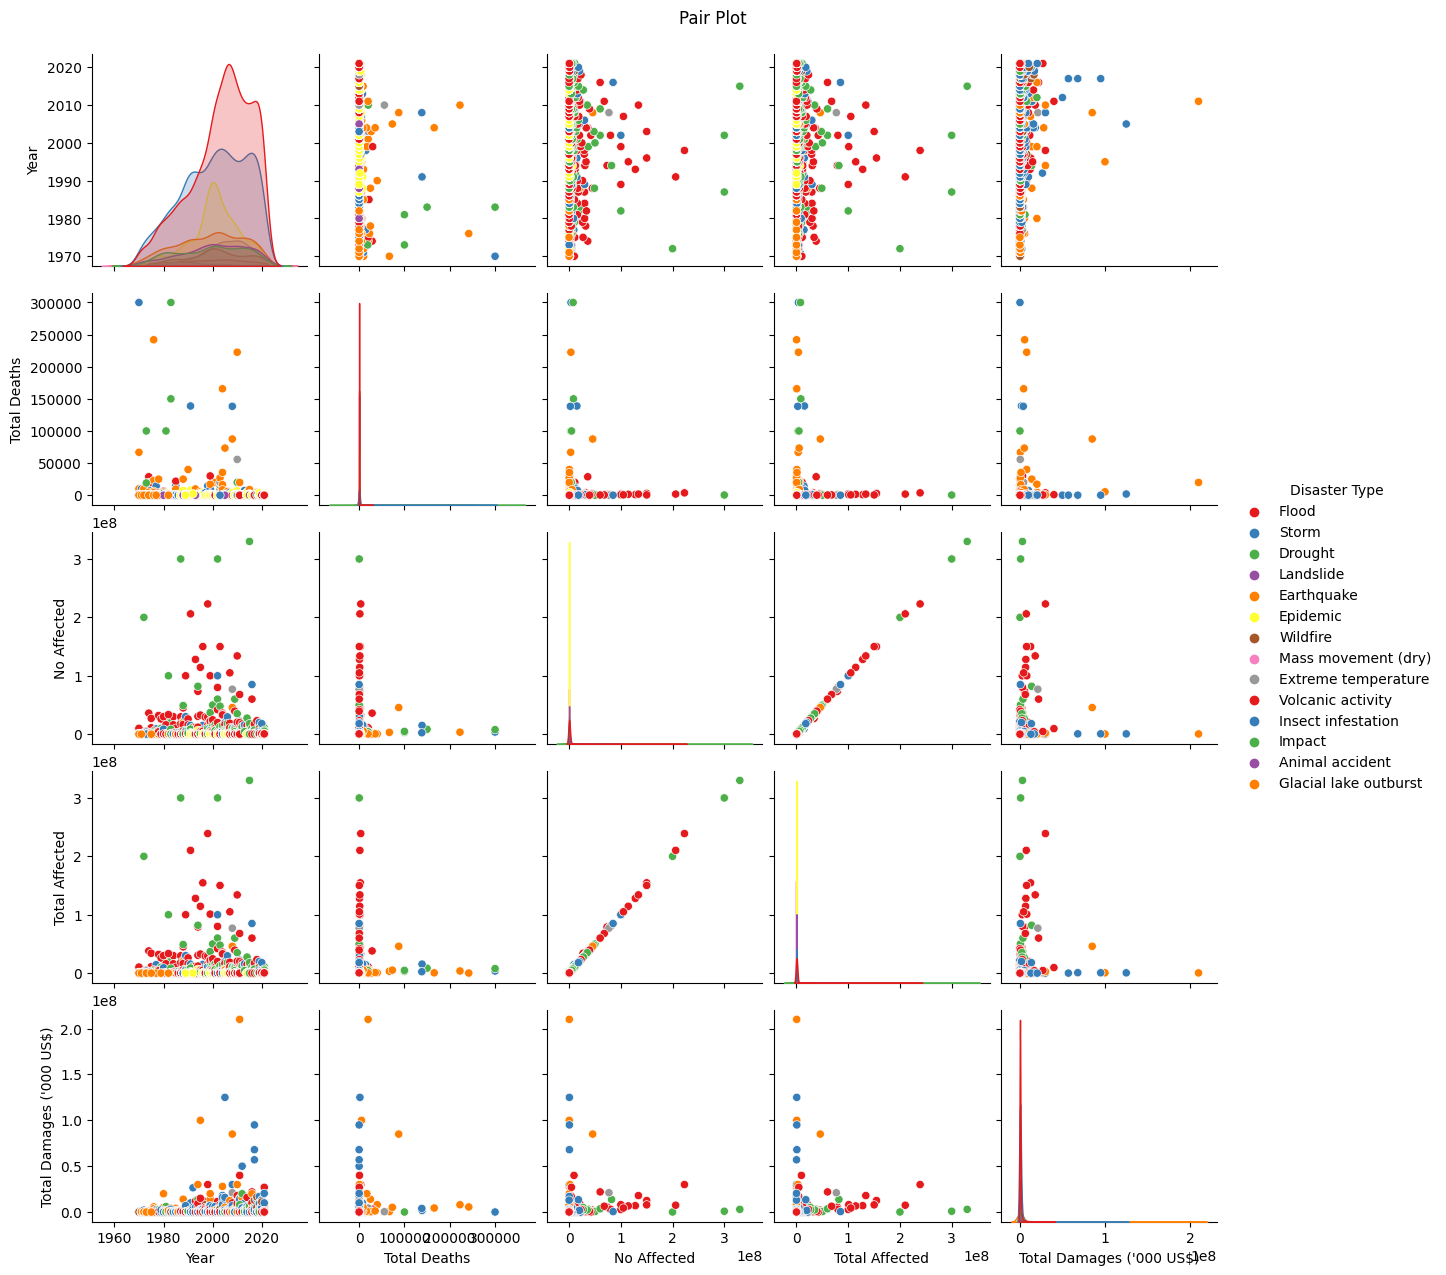

In [ ]:
sns.pairplot(Project_Dataset, hue='Disaster Type', palette='Set1')

# Add a title to the entire pair plot
plt.suptitle('Pair Plot ', y=1.02)

# Show the plot
plt.show()


# KNN,Leniar Regression or Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Assuming 'Disaster_Type' and 'Location' are categorical features
# 'Date' is a datetime feature, and 'Affected_People' is the target variable
categorical_features = ['Disaster Type', 'Country']
datetime_feature = ['Year']
target_column = 'Total Affected'

# Selecting features and target variable
X = df[categorical_features + datetime_feature]
y = df[target_column]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separate transformers for categorical and datetime features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('datetime', StandardScaler(), datetime_feature)  # Using StandardScaler for datetime for demonstration
    ])

# Train different models in a pipeline
knn_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=3))  # Adjust the number of neighbors as needed
])

linear_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

decision_tree_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor())
])

# Fit the models
knn_model.fit(X_train, y_train)
linear_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)

# Predictions
knn_preds = knn_model.predict(X_test)
linear_preds = linear_model.predict(X_test)
decision_tree_preds = decision_tree_model.predict(X_test)

# Evaluate models using Mean Squared Error
knn_mse = mean_squared_error(y_test, knn_preds)
linear_mse = mean_squared_error(y_test, linear_preds)
decision_tree_mse = mean_squared_error(y_test, decision_tree_preds)

# Display Mean Squared Error for each model
print("KNN Mean Squared Error:", knn_mse)
print("Linear Regression Mean Squared Error:", linear_mse)
print("Decision Tree Mean Squared Error:", decision_tree_mse)


KNN Mean Squared Error: 101146987433230.0
Linear Regression Mean Squared Error: 95335269019084.5
Decision Tree Mean Squared Error: 96479270385186.45


#Conclusion

###Lower MSE values are generally better, as they indicate that the model's predictions are closer to the actual values

###In our Project, the KNN model has the lowest MSE among the three models, So it performs better in terms of minimizing the squared differences between predicted and actual values.



###The analysis reveals a concerning pattern in disaster occurrences, with floods, storms, and pandemics emerging as the most prevalent. The striking proximity between total deaths and total affected individuals underscores the urgent need for robust disaster preparedness and response strategies to mitigate the devastating impact on communities.

In [2]:
! pip install ydata-Profiling
import pandas as pd
from ydata_profiling import ProfileReport


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.6/381.6 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 63.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=8283b7948f50c1c088ddd0851dd26cbb21cf414d8bd1f8b7ebb361e412f2ae7b
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
  

In [4]:
df = pd.read_csv('Project_Dataset.csv')
profile = ProfileReport(df, title="Profiling Report")
profile.to_file('output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]